3. Machine Learning for Classification

We'll use logistic regression to predict churn

3.1 Churn prediction project

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv

--2025-08-01 19:10:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954,59K  5,47MB/s    in 0,2s    

2025-08-01 19:10:59 (5,47 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [126]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [128]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [129]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [130]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [131]:
df.totalcharges = df.totalcharges.fillna(0)

In [132]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [133]:
df.churn = (df.churn == 'yes').astype(int)

In [134]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [135]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [136]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [137]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [138]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [139]:
df_train.churn.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [140]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [141]:
df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,no,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,no,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,yes,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,yes,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,yes,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45


EDA

In [26]:
df_full_train = df_full_train.reset_index(drop=True)

In [30]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [47]:
global_churn = df_full_train.churn.mean()
round(global_churn,2)

np.float64(0.27)

In [34]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [143]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [144]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [41]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature importance

In [43]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [44]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [45]:
df_full_train[df_full_train.partner == 'yes'].churn.mean()

np.float64(0.20503330866025166)

In [46]:
df_full_train[df_full_train.partner == 'no'].churn.mean()

np.float64(0.3298090040927694)

In [54]:
print(df_full_train.churn.mean())

0.26996805111821087


In [55]:
from IPython.display import display
global_churn = df_full_train.churn.mean()
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risl'] = df_group['mean'] / global_churn
    
    display(df_group)
    print()

,mean,count,diff,risl
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risl
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risl
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risl
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risl
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risl
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risl
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risl
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risl
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risl
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risl
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risl
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risl
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risl
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risl
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risl
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Feature importance: mutual information

In [56]:
from sklearn.metrics import mutual_info_score

In [58]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [61]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [63]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Feature importance: Correlation

In [230]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [67]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()
#hight rate of churn for first year

np.float64(0.3994413407821229)

In [68]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()
# for average price less then 50$ change of churn is less then 20%

np.float64(0.18340943683409436)

One-hot encoding

In [142]:
from sklearn.feature_extraction import DictVectorizer

In [145]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [85]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [87]:
z = np.linspace(-5,5,51)
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

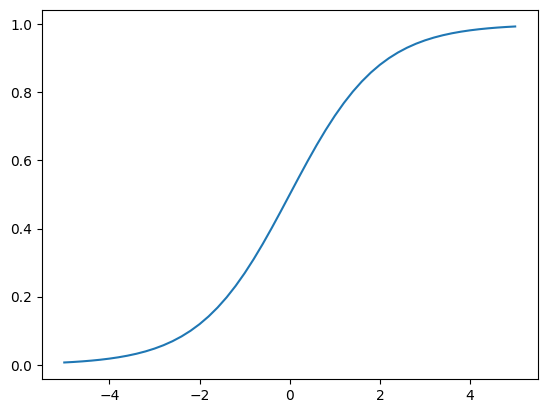

In [88]:
plt.plot(z, sigmoid(z))

In [89]:
w = []
w0 = 0
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result 

Train logistic regression with scikit-learn

In [151]:
from sklearn.linear_model import LogisticRegression

In [123]:
# len(y_train)
print(X_train.shape[0], len(y_train))

4225 4225


In [175]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [167]:
model = LogisticRegression(max_iter=2010)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly

model.fit(X_train, y_train)


LogisticRegression(max_iter=2010)

In [168]:
model.coef_

array([[ 6.78930557e-01,  3.21988740e-02, -6.78767858e-01,
         5.22635124e-02, -1.99019399e-02,  1.10850394e-01,
        -1.56774904e-01,  7.82860820e-02,  3.50981656e-02,
        -2.73659316e-03, -4.90085187e-01,  6.79221664e-01,
        -1.56774904e-01, -1.68791174e-02, -1.90485793e-01,
         6.95846702e-02,  1.53262696e-01,  1.13560742e-01,
        -1.56774904e-01,  7.55757340e-02,  2.82041722e-01,
        -1.56774904e-01, -9.29052462e-02, -1.66064570e-01,
         1.98426142e-01, -4.90173255e-02,  8.13788980e-02,
        -5.33385503e-02, -4.60291462e-03,  1.03369121e-01,
        -1.30660840e-02,  6.95846702e-02, -3.72230978e-02,
         1.94323809e-01, -9.51110907e-02, -1.56774904e-01,
         2.84247567e-01, -5.46194074e-02, -1.56774904e-01,
         2.43755884e-01,  2.31953781e-01, -1.56774904e-01,
        -4.28173052e-02, -6.84837805e-02,  3.94845781e-04]])

In [185]:
model.intercept_[0]

np.float64(-0.049718459921326834)

In [186]:
model.coef_[0].round(3)

array([ 0.679,  0.032, -0.679,  0.052, -0.02 ,  0.111, -0.157,  0.078,
        0.035, -0.003, -0.49 ,  0.679, -0.157, -0.017, -0.19 ,  0.07 ,
        0.153,  0.114, -0.157,  0.076,  0.282, -0.157, -0.093, -0.166,
        0.198, -0.049,  0.081, -0.053, -0.005,  0.103, -0.013,  0.07 ,
       -0.037,  0.194, -0.095, -0.157,  0.284, -0.055, -0.157,  0.244,
        0.232, -0.157, -0.043, -0.068,  0.   ])

In [178]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred > 0.5)
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [180]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [179]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [181]:
(churn_decision.astype(int) == y_val).mean()

np.float64(0.8034066713981547)

In [182]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual_value'] = y_val
df_pred

,probability,prediction,actual_value
0,0.006676,0,0
1,0.204689,0,0
2,0.217809,0,0
3,0.563836,1,1
4,0.218659,0,0
...,...,...,...
1404,0.291432,0,0
1405,0.041335,0,1
1406,0.151350,0,0
1407,0.788275,1,1


In [183]:
df_pred['correct'] = df_pred.prediction == df_pred.actual_value
df_pred

,probability,prediction,actual_value,correct
0,0.006676,0,0,True
1,0.204689,0,0,True
2,0.217809,0,0,True
3,0.563836,1,1,True
4,0.218659,0,0,True
...,...,...,...,...
1404,0.291432,0,0,True
1405,0.041335,0,1,False
1406,0.151350,0,0,True
1407,0.788275,1,1,True


In [184]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

Model interpretation

In [187]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.679),
 'contract=one_year': np.float64(0.032),
 'contract=two_year': np.float64(-0.679),
 'dependents=no': np.float64(0.052),
 'dependents=yes': np.float64(-0.02),
 'deviceprotection=no': np.float64(0.111),
 'deviceprotection=no_internet_service': np.float64(-0.157),
 'deviceprotection=yes': np.float64(0.078),
 'gender=female': np.float64(0.035),
 'gender=male': np.float64(-0.003),
 'internetservice=dsl': np.float64(-0.49),
 'internetservice=fiber_optic': np.float64(0.679),
 'internetservice=no': np.float64(-0.157),
 'monthlycharges': np.float64(-0.017),
 'multiplelines=no': np.float64(-0.19),
 'multiplelines=no_phone_service': np.float64(0.07),
 'multiplelines=yes': np.float64(0.153),
 'onlinebackup=no': np.float64(0.114),
 'onlinebackup=no_internet_service': np.float64(-0.157),
 'onlinebackup=yes': np.float64(0.076),
 'onlinesecurity=no': np.float64(0.282),
 'onlinesecurity=no_internet_service': np.float64(-0.157),
 'onlinesecurity=yes': np.fl

In [191]:
small = ['contract', 'tenure', 'monthlycharges']


[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [201]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [202]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [203]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [204]:
X_train_small = dv_small.transform(dicts_train_small)
X_small_val = dv_small.transform(dicts_val_small)

In [206]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [210]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575969365797)

In [211]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [212]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [213]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [214]:
sigmoid(_)

np.float64(0.030090303318277657)

Using model

In [215]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [216]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [217]:
y_full_train = df_full_train.churn.values

In [219]:
model = LogisticRegression(solver='lbfgs', max_iter=2010)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=2010)

In [220]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [221]:
X_test = dv.transform(dicts_test)

In [222]:
y_pred = model.predict_proba(X_test)[:, 1]

In [223]:
churn_decision = (y_pred >= 0.5)

In [224]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [225]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [226]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [227]:
X_small = dv.transform([customer])

In [228]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6379383505204976)

In [229]:
y_test[-1]

np.int64(1)